<a href="https://colab.research.google.com/github/satyashah/Automotive-Prediction-Models/blob/main/Automotive_Prediction_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
#import btalib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense, Dropout, LSTM
# from tensorflow.keras.models import Sequential
from sklearn import tree
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Data Collection & Preprocessing

In [ ]:
#Retreiving the data from my google drive
copied_path = 'gdrive/MyDrive/carData.csv' #remove ‘content/’ from path then use 
data = pd.read_csv(copied_path, names=["stockNumber","miles","displayPrice","year","make","model","transmission","drive","exteriorColor","interiorColor","mpgCity","mpgHighway","engineSize","engineCylinders","storeName","storeID", "features"], header=0)
data

In [ ]:
#deletes all incorrect or empty data
data = data[data != "None"]
data = data.dropna()

In [ ]:
rawTrain = data.sample(frac=0.8, random_state=10)
rawTest = data.drop(rawTrain.index)

rawTrain_features = rawTrain.copy()
rawTest_features = rawTest.copy()

rawTrain_labels = rawTrain_features.pop('displayPrice')
rawTest_labels =rawTest_features.pop('displayPrice')

rawTrainFeatures = np.array(rawTrain_features)
rawTestFeatures = np.array(rawTrain_features)

rawTrainLabels = np.array(rawTrain_labels)
rawTestLabels = np.array(rawTrain_labels)

In [ ]:
#Turn things into arrays of [1,0,1,0]

def encode(dataList, indexList):
  encodedList = []
  for data in dataList:
    carIndex = indexList.index(data)
    carArr = [0]*len(indexList)
    carArr[carIndex] = 1
    encodedList.append(carArr)
  return encodedList

def encodeSingle(value, indexList):
  index = indexList.index(value)
  carArr = [0]*len(indexList)
  carArr[index] = 1
  return carArr

In [ ]:
components = ["year","make","model","transmission","drive","exteriorColor","interiorColor","storeName","storeID"]
for component in components:
  dataList = list(data[component].values)
  
  indexList = list(set(data[component]))
  encodedList = encode(dataList, indexList)
  data[component] = encodedList

  print("\""+str(component)+"\" :", [str(index).lower() for index in indexList], ",")

"year" : ['2016', '2017', '2018', '2019', '2020', '2021', '2010', '2011', '2012', '2013', '2014', '2015'] ,
"make" : ['volkswagen', 'buick', 'ram', 'mazda', 'jeep', 'toyota', 'dodge', 'fiat', 'honda', 'smart', 'genesis', 'land rover', 'acura', 'chrysler', 'ford', 'lexus', 'nissan', 'hyundai', 'mercedes-benz', 'gmc', 'lincoln', 'scion', 'chevrolet', 'mini', 'bmw', 'infiniti', 'porsche', 'audi', 'subaru', 'jaguar', 'kia', 'cadillac', 'volvo', 'mitsubishi'] ,
"model" : ['envision', 'a3', 'tribeca', 'quest', 'optima', 'ml400', 'lancer', 'beetle', 'mazda2', 'forte5', 'explorer', 'tundra', 'renegade', 'gti', 'ux 250h', 'c43 amg', 'optima hybrid', 'e350', '528', 'es 350', '300', 'golf alltrack', 'boxster', 'cayman', 'venue', 'grand caravan', 'c450 amg', 'xj', 'expedition el', '228', 'rc 300', '230', 'regal sportback', 'rdx', 'tiguan', 'im', '335', 'ss', 'f150', 'xc90', 'versa', 'g37', 'fj cruiser', '840', 'outback', 'lacrosse', 'qx60', 'm37', '320', 'gle53 amg', '370z', 'accord', 'mkz hybrid'

In [ ]:
data = data.drop(columns=["stockNumber", "storeName","storeID", "features"])

In [ ]:
train_dataset = data.sample(frac=0.8, random_state=10)
test_dataset = data.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('displayPrice')
test_labels = test_features.pop('displayPrice')

In [ ]:
def flatten(arr):
  flatArr = []
  for i in arr:
    if isinstance(i, float) or isinstance(i, int) or isinstance(i, str):
      flatArr.append(float(i))
    else:
      flatArr.extend(i)
  return flatArr

In [ ]:
array = list(np.asarray(train_features))

flatTrain = []
for i in array:
  flatTrain.append(flatten(i))

array = list(np.asarray(test_features))

flatTest = []
for i in array:
  flatTest.append(flatten(i))


flatTrain = np.array(flatTrain).astype('float32')
flatTest = np.array(flatTest).astype('float32')

In [ ]:
trainLabels = np.array([[val] for val in train_labels.values.astype('float32')])
testLabels = np.array([[val] for val in test_labels.values.astype('float32')])

# Neural Network

In [ ]:
normalizer = preprocessing.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.asarray(flatTrain).astype('float32'))

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(556, activation='relu'),
      layers.Dense(192, activation='relu'),
      layers.Dense(48, activation='relu'),
      layers.Dense(12, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 527)              1055      
 n)                                                              
                                                                 
 dense (Dense)               (None, 556)               293568    
                                                                 
 dense_1 (Dense)             (None, 192)               106944    
                                                                 
 dense_2 (Dense)             (None, 48)                9264      
                                                                 
 dense_3 (Dense)             (None, 12)                588       
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                        

In [ ]:
print( np.asarray(flatTrain).astype('float32'))

[[110627.       0.       0.  ...     35.       2.4      4. ]
 [ 72675.       1.       0.  ...     33.       2.5      4. ]
 [ 92937.       1.       0.  ...     26.       2.5      4. ]
 ...
 [ 53449.       0.       0.  ...     37.       2.       4. ]
 [ 15719.       0.       1.  ...     33.       2.5      4. ]
 [ 33483.       0.       0.  ...     25.       3.6      6. ]]


In [ ]:
%%time
history = dnn_model.fit(
    np.asarray(flatTrain).astype('float32'), np.asarray(trainLabels).astype('float32'),
    validation_split=0.2,
    verbose=1, epochs=30)

Epoch 1/30
358/358 [==============================] - 5s 9ms/step - loss: 11557.4268 - val_loss: 4545.5459
Epoch 2/30
358/358 [==============================] - 2s 7ms/step - loss: 3944.5334 - val_loss: 3913.0007
Epoch 3/30
358/358 [==============================] - 2s 7ms/step - loss: 3468.8000 - val_loss: 3537.1289
Epoch 4/30
358/358 [==============================] - 2s 7ms/step - loss: 3150.4695 - val_loss: 3257.3713
Epoch 5/30
358/358 [==============================] - 2s 6ms/step - loss: 2875.3447 - val_loss: 3090.1443
Epoch 6/30
358/358 [==============================] - 2s 6ms/step - loss: 2645.1001 - val_loss: 2912.1125
Epoch 7/30
358/358 [==============================] - 2s 6ms/step - loss: 2478.5305 - val_loss: 2726.5554
Epoch 8/30
358/358 [==============================] - 2s 6ms/step - loss: 2324.6267 - val_loss: 2683.4224
Epoch 9/30
358/358 [==============================] - 2s 6ms/step - loss: 2222.4492 - val_loss: 2512.1453
Epoch 10/30
358/358 [========================

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [$]')
  plt.legend()
  plt.grid(True)

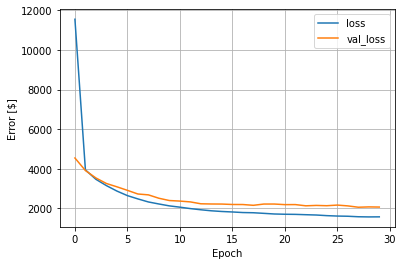

In [ ]:
plot_loss(history)

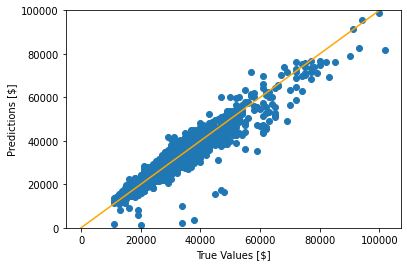

In [ ]:
test_predictions = dnn_model.predict(np.asarray(flatTest).astype('float32')).flatten()

#a = plt.axes(aspect='equal')
plt.scatter(np.asarray(testLabels).astype('float32'), np.asarray(test_predictions).astype('float32'))
plt.xlabel('True Values [$]')
plt.ylabel('Predictions [$]')
plt.ylim([0,100000])
plt.plot(np.arange(100000),np.arange(100000),c="orange")

In [ ]:
y_true = []
y_pred = []

for i in range(len(test_predictions)):
  # if test_predictions[i]> 150000:
  #   pass
  # else:
    y_pred.append(test_predictions[i])
    y_true.append(testLabels[i][0])

In [ ]:
print(y_true)
print(y_pred)

[30998.0, 13998.0, 19998.0, 24998.0, 34998.0, 31998.0, 27998.0, 14599.0, 27998.0, 19998.0, 19998.0, 29998.0, 17998.0, 23998.0, 43998.0, 29998.0, 20998.0, 22998.0, 19998.0, 28998.0, 36998.0, 19998.0, 26998.0, 29998.0, 46998.0, 37998.0, 19998.0, 19998.0, 31998.0, 25998.0, 36998.0, 17998.0, 16998.0, 33998.0, 18998.0, 30998.0, 13998.0, 21998.0, 19998.0, 42998.0, 17998.0, 28998.0, 35998.0, 21998.0, 36998.0, 37998.0, 19998.0, 34998.0, 19998.0, 46998.0, 27998.0, 25998.0, 21998.0, 21998.0, 39998.0, 20998.0, 37998.0, 52998.0, 27998.0, 31998.0, 44998.0, 29998.0, 17998.0, 61998.0, 31998.0, 31998.0, 33998.0, 28998.0, 41998.0, 18998.0, 55998.0, 28998.0, 101998.0, 25998.0, 20998.0, 16998.0, 18998.0, 27998.0, 19998.0, 27998.0, 27998.0, 31998.0, 21998.0, 42998.0, 21998.0, 28998.0, 27998.0, 18998.0, 17998.0, 35998.0, 28998.0, 18998.0, 29998.0, 14998.0, 23998.0, 29998.0, 19998.0, 34998.0, 21998.0, 30998.0, 19998.0, 18998.0, 20998.0, 21998.0, 17998.0, 30998.0, 18998.0, 18998.0, 17998.0, 24998.0, 40998.0,

In [ ]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


mape(y_true, y_pred)

6.471286714076996

In [ ]:
f = open("annData.csv","w+")

f.write("True, Predicted,\n")
for i in range(len(y_true)):
  f.write(str(y_true[i])+","+str(y_pred[i])+",\n")

f.close()


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(flatTrain, trainLabels.ravel())

#Predict Output
knnResults= model.predict(flatTest) # 0:Overcast, 2:Mild

In [ ]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
mape(testLabels.ravel(), knnResults)

25.31399428844452

In [ ]:
# f = open("dataDT.csv","w+")
# for i in range(len(testlabels)):
#   f.write(str(testlabels[i][0])+","+str(predicted[i])+"\n")

# f.close()

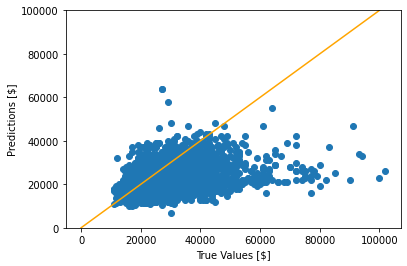

In [ ]:
plt.scatter(np.asarray(testLabels).astype('float32'),np.asarray(knnResults).astype('float32'))
plt.xlabel('True Values [$]')
plt.ylabel('Predictions [$]')
plt.ylim([0,100000])
plt.plot(np.arange(100000),np.arange(100000),c="orange")

# Decision Trees

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(flatTrain, trainLabels)

In [ ]:
dtResults = clf.predict(flatTest)

In [ ]:
mape(dtResults, testLabels.ravel())

9.36952650880495

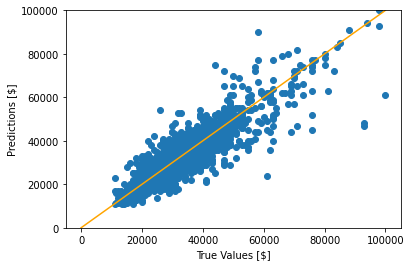

In [ ]:
plt.scatter(np.asarray(dtResults).astype('float32'), np.asarray(testLabels).astype('float32'))
plt.xlabel('True Values [$]')
plt.ylabel('Predictions [$]')
plt.ylim([0,100000])
plt.plot(np.arange(100000),np.arange(100000),c="orange")

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
clf = RandomForestRegressor()

In [ ]:
rf_model = clf.fit(flatTrain, trainLabels.ravel())

In [ ]:
rfResults = rf_model.predict(flatTest)

In [ ]:
mape(rfResults, testLabels.ravel())

6.711440729939648

In [ ]:
print(testLabels.ravel())
print(rfResults)

[30998. 13998. 19998. ... 27998. 22998. 33998.]
[29128.   15218.15 19748.   ... 28488.   25798.   33288.  ]


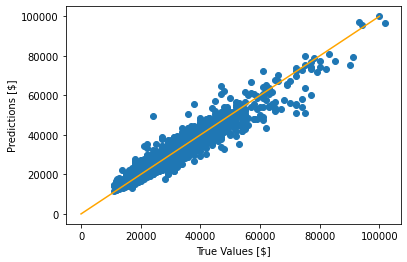

In [ ]:
plt.scatter(testLabels.ravel(),rfResults)
plt.xlabel('True Values [$]')
plt.ylabel('Predictions [$]')
# plt.ylim([0,100000])
plt.plot(np.arange(100000),np.arange(100000),c="orange")

In [ ]:
f = open("rfData.csv","w+")

f.write("True, Predicted,\n")
for i in range(len(y_true)):
  f.write(str(testLabels[i][0])+","+str(rfResults[i])+",\n")

f.close()

#SVM MODEL

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVR()
clf.fit(flatTrain, trainLabels.ravel())

SVR()

In [ ]:
svmResults = clf.predict(flatTest)

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


mape(svmResults, testLabels.ravel())

29.29046502677094

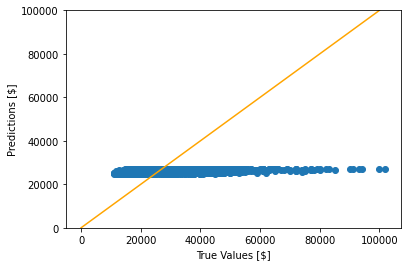

In [ ]:
plt.scatter(np.asarray(testLabels).astype('float32'),np.asarray(svmResults).astype('float32'))
plt.xlabel('True Values [$]')
plt.ylabel('Predictions [$]')
plt.ylim([0,100000])
plt.plot(np.arange(100000),np.arange(100000),c="orange")

# ANN RF Ensemble

In [ ]:
ensResults = []
count = 0
for test in flatTest:
  count+=1
  test = np.asarray([list(test)])

  print(count/len(flatTest))

  rf = rf_model.predict(test)[0]
  dnn = dnn_model.predict(test)[0][0]

  print(rf,dnn)
  print((rf+dnn)/2)
  ensResults.append((rf+dnn)/2)

print(ensResults)

Streaming output truncated to the last 5000 lines.
36415.85546875
0.5345261392228124
24428.0 25503.754
24965.876953125
0.5348057031031591
16924.06 16224.806
16574.43283203125
0.5350852669835058
45538.0 42086.805
43812.40234375
0.5353648308638523
19998.0 20377.855
20187.927734375
0.535644394744199
23718.0 24559.61
24138.8046875
0.5359239586245457
37498.0 34924.766
36211.3828125
0.5362035225048923
27768.0 28654.92
28211.4599609375
0.536483086385239
18548.0 17532.93
18040.46484375
0.5367626502655857
20118.0 19919.598
20018.798828125
0.5370422141459323
37248.0 37283.82
37265.91015625
0.537321778026279
32018.0 30242.096
31130.0478515625
0.5376013419066257
44528.0 42652.695
43590.34765625
0.5378809057869723
33998.0 33223.883
33610.94140625
0.538160469667319
21398.0 18320.191
19859.095703125
0.5384400335476657
44008.0 41264.555
42636.27734375
0.5387195974280123
30558.0 30449.787
30503.8935546875
0.538999161308359
42348.0 43346.668
42847.333984375
0.5392787251887056
19518.0 19769.47
19643.7353

In [ ]:
testLabelsFilt = []
ensResultsFilt = []

for i in range(len(ensResults)):
  if ensResults[i] < 150000:
    testLabelsFilt.append(testLabels.ravel()[i])
    ensResultsFilt.append(ensResults[i])

In [ ]:
mape(ensResults, testLabels)

40.1298615149558

In [ ]:
mape(ensResultsFilt, testLabelsFilt)

5.9930315180145035

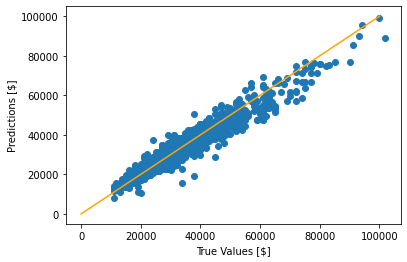

In [ ]:
plt.scatter(testLabelsFilt,ensResultsFilt)
plt.xlabel('True Values [$]')
plt.ylabel('Predictions [$]')
# plt.ylim([0,100000])
plt.plot(np.arange(100000),np.arange(100000),c="orange")